<a href="https://colab.research.google.com/github/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/In_class_exercise_04_SaiNithinReddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [8]:
# Write your code here
import nltk; nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [11]:
# Import necessary libraries for topic modeling using Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Import spaCy for lemmatization
import spacy

# Import visualization tools for displaying topics
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

# Enable Matplotlib plots to display inline in Jupyter notebook
%matplotlib inline

# Set up logging to manage logging messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Ignore DeprecationWarnings to avoid warning messages in the notebook
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [12]:
# Import necessary libraries for web scraping
import requests
from bs4 import BeautifulSoup

# Specify the URL to scrape and add necessary headers
url = 'https://www.amazon.com/product-reviews/B0B9HGV6JB/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar'
headers = {'User-Agent': 'Mozilla/5.0'}

# Create empty lists to store the titles and review text
titles = []
text = []

# Loop through the first 150 pages of reviews and scrape the title and text for each review
for pg in range(1, 150):
    # Send a request to the URL and get the content
    response = requests.get(url, headers=headers)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the title text and append it to the titles list
    titles += [title.get_text().strip() for title in soup.find_all('a', class_='review-title-content')]
    
    # Extract the review text and append it to the text list
    text += [review.get_text().strip() for review in soup.find_all('span', class_='review-text-content')]



In [13]:
# Tile column contains the title and reciew contains the text
data = {'Title': titles, 'Review': text}
raw_data = pd.DataFrame(data)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   90 non-null     object
 1   Review  90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [14]:
raw_data.head()

,Title,Review
0,Convenient Blood Pressure monitor,"Due to fluctuating blood pressure, I have had ..."
1,Easy to read and use,"After my last Doctors visit, I had a high bloo..."
2,Good monitor,"I really like this monitor, took it with me to..."
3,Accurate and easy to use,This is well made and a great price. I know it...
4,Easy to use by yourself,I bought this to check blood pressure when alo...


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

raw_data["Review"] = raw_data["Review"].apply(cleantext)

# Convert to list
data = raw_data['Review'].values.tolist()

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [18]:
b = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
t = gensim.models.Phrases(b[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bmod = gensim.models.phrases.Phraser(b)
tmod = gensim.models.phrases.Phraser(t)

# See trigram example
print(tmod[bmod[data_words[0]]])

['due', 'to', 'fluctuating', 'blood', 'pressure', 'have', 'had', 'to', 'take', 'my', 'blood', 'pressure', 'quite', 'often', 'this', 'monitor', 'has', 'worked', 'out', 'very', 'well', 'for', 'me', 'to', 'be', 'able', 'to', 'take', 'it', 'with', 'me', 'when', 'travel', 'it', 'very', 'easy', 'to', 'use', 'and', 'believe', 'it', 'to', 'be', 'very', 'accurate', 'it', 'makes', 'taking', 'my', 'blood', 'pressure', 'often', 'very', 'simple', 'and', 'easy']


In [19]:
raw_data.head()

,Title,Review
0,Convenient Blood Pressure monitor,Due to fluctuating blood pressure I have had ...
1,Easy to read and use,After my last Doctors visit I had a high bloo...
2,Good monitor,I really like this monitor took it with me to...
3,Accurate and easy to use,This is well made and a great price I know it...
4,Easy to use by yourself,I bought this to check blood pressure when alo...


In [20]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bmod[doc] for doc in texts]

def make_trigrams(texts):
    return [tmod[bmod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['due', 'fluctuate', 'blood', 'pressure', 'take', 'blood', 'pressure', 'quite', 'often', 'monitor', 'work', 'well', 'able', 'take', 'travel', 'easy', 'use', 'believe', 'accurate', 'make', 'take', 'blood', 'pressure', 'often', 'simple', 'easy']]


In [22]:
raw_data.to_csv("output.csv", index=False)

In [23]:
# Create a dictionary based on the lemmatized data
id2word = corpora.Dictionary(data_lemmatized)

# Create a corpus by creating a bag-of-words representation of the texts
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

# Print the first document in the corpus to check if it worked correctly
print(corpus[0])


[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1)]


In [24]:
id2word[0]

'able'

In [25]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('accurate', 1),
  ('believe', 1),
  ('blood', 3),
  ('due', 1),
  ('easy', 2),
  ('fluctuate', 1),
  ('make', 1),
  ('monitor', 1),
  ('often', 2),
  ('pressure', 3),
  ('quite', 1),
  ('simple', 1),
  ('take', 3),
  ('travel', 1),
  ('use', 1),
  ('well', 1),
  ('work', 1)]]

In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
# Key word in 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.088*"unit" + 0.045*"take" + 0.044*"accuracy" + 0.044*"great" + 0.044*"recommend" + 0.044*"strongly" + 0.044*"replace" + 0.044*"feature" + 0.044*"zixcare" + 0.044*"pleased"'), (1, '0.088*"blood" + 0.088*"pressure" + 0.066*"monitor" + 0.044*"easy" + 0.044*"need" + 0.044*"read" + 0.022*"doctor" + 0.022*"machine" + 0.022*"accurate" + 0.022*"time"'), (2, '0.008*"take" + 0.008*"unit" + 0.007*"great" + 0.007*"accuracy" + 0.007*"stop" + 0.007*"know" + 0.007*"time" + 0.007*"brand" + 0.007*"verify" + 0.007*"accurate"'), (3, '0.089*"use" + 0.045*"recommend" + 0.045*"monitor" + 0.044*"easy" + 0.044*"adjustable" + 0.044*"home" + 0.044*"reading" + 0.044*"overall" + 0.044*"well" + 0.044*"big"'), (4, '0.085*"great" + 0.085*"store" + 0.043*"unit" + 0.043*"pressure" + 0.043*"battery" + 0.043*"blood" + 0.043*"buy" + 0.043*"time" + 0.043*"arrival" + 0.043*"check"'), (5, '0.081*"easy" + 0.040*"pressure" + 0.040*"blood" + 0.020*"unit" + 0.020*"buy" + 0.020*"battery" + 0.020*"doctor" + 0.020*"accurat

In [28]:
# To caluculate the Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# To caluculate the Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.8181745725309746

Coherence Score:  0.8026381328918888


In [29]:
# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.071727  0.160713       1        1  18.367966
7      0.109986  0.127187       2        1  17.981854
1      0.054808  0.133173       3        1  16.920304
6     -0.138715 -0.001156       4        1  12.295212
9      0.154143 -0.169703       5        1   9.609007
4     -0.248004  0.164502       6        1   8.459883
0     -0.218071 -0.265463       7        1   8.076924
3      0.246520 -0.099493       8        1   8.073482
8      0.003504 -0.029671       9        1   0.111806
2     -0.035900 -0.020090      10        1   0.103562, topic_info=         Term       Freq       Total Category  logprob  loglift
15        use  68.000000   68.000000  Default  30.0000  30.0000
8     monitor  69.000000   69.000000  Default  29.0000  29.0000
37       read  43.000000   43.000000  Default  28.0000  28.0000
13       take  60.000000   60.000000  Default  27.0000  27.0000
83       unit  34.000000   34.000000  Default  26.0000  26.0000
..        ...        ...         ...      ...      ...      ...
1    accurate   0.017139   52.577403  Topic10  -4.9516  -1.1559
39  recommend   0.017012   43.166880  Topic10  -4.9590  -0.9662
10   pressure   0.016646  104.262984  Topic10  -4.9807  -1.8698
28       high   0.016621   18.049994  Topic10  -4.9822  -0.1175
26        get   0.016613   18.050027  Topic10  -4.9827  -0.1179

[407 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.955127      able
46        4  0.344366  accuracy
46        5  0.344366  accuracy
46        7  0.306103  accuracy
1         1  0.171176  accurate
...     ...       ...       ...
16        8  0.303250      well
17        2  0.505763      work
17        6  0.449567      work
45        3  0.506471   zixcare
45        7  0.450197   zixcare

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 2, 7, 10, 5, 1, 4, 9, 3])

In [30]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

mallet_path = "/content/mallet-2.0.8/bin/mallet"
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

--2023-04-03 03:35:50--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-04-03 03:35:50--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.5’

mallet-2.0.8.zip.5  100%[===================>]  15.43M  25.5MB/s    in 0.6s    

2023-04-03 03:35:51 (25.5 MB/s) - ‘mallet-2.0.8.zip.5’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2class

In [32]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('blood', 0.3763440860215054),
   ('pressure', 0.3548387096774194),
   ('doctor', 0.26881720430107525),
   ('set', 0.0),
   ('single', 0.0),
   ('solely', 0.0),
   ('stand', 0.0),
   ('sweet', 0.0),
   ('user', 0.0),
   ('way', 0.0)]),
 (16,
  [('background', 0.06766917293233082),
   ('push', 0.06766917293233082),
   ('user', 0.06766917293233082),
   ('solely', 0.06766917293233082),
   ('set', 0.06766917293233082),
   ('rely', 0.06766917293233082),
   ('plug', 0.06766917293233082),
   ('button', 0.06766917293233082),
   ('black', 0.06766917293233082),
   ('battery', 0.06766917293233082)]),
 (14,
  [('pressure', 0.6935483870967742),
   ('accurate', 0.22580645161290322),
   ('nice', 0.04838709677419355),
   ('visit', 0.016129032258064516),
   ('lot', 0.016129032258064516),
   ('way', 0.0),
   ('sweet', 0.0),
   ('different', 0.0),
   ('user', 0.0),
   ('stand', 0.0)]),
 (2,
  [('zixcare', 0.08527131782945736),
   ('stop', 0.06976744186046512),
   ('review', 0.06976744186046512),

In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [34]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=2)

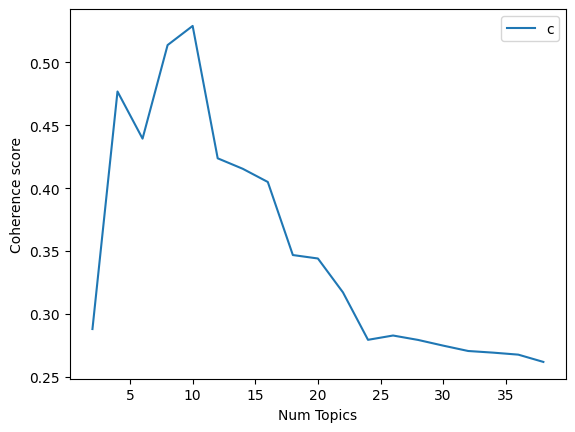

In [35]:

limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.288
Num Topics = 4  has Coherence Value of 0.4768
Num Topics = 6  has Coherence Value of 0.4393
Num Topics = 8  has Coherence Value of 0.5137
Num Topics = 10  has Coherence Value of 0.5289
Num Topics = 12  has Coherence Value of 0.4237
Num Topics = 14  has Coherence Value of 0.4154
Num Topics = 16  has Coherence Value of 0.4049
Num Topics = 18  has Coherence Value of 0.3468
Num Topics = 20  has Coherence Value of 0.3441
Num Topics = 22  has Coherence Value of 0.3172
Num Topics = 24  has Coherence Value of 0.2795
Num Topics = 26  has Coherence Value of 0.2829
Num Topics = 28  has Coherence Value of 0.2794
Num Topics = 30  has Coherence Value of 0.2749
Num Topics = 32  has Coherence Value of 0.2706
Num Topics = 34  has Coherence Value of 0.2693
Num Topics = 36  has Coherence Value of 0.2677
Num Topics = 38  has Coherence Value of 0.2619


In [37]:
# Select the model and print the topics
optimal_model = model_list[14]
#model_list[4] indicates that: model_list is a list that has been defined earlier and contains the number of topics and its coherence values.
# Since I have decided 10 to be the ideal number of topics, Topics number 30 is present in the 14th place of the list.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(16,
  '0.429*"nice" + 0.381*"number" + 0.095*"good" + 0.048*"large" + 0.024*"easy" '
  '+ 0.024*"battery" + 0.000*"sweet" + 0.000*"feature" + 0.000*"way" + '
  '0.000*"user"'),
 (18,
  '0.569*"accurate" + 0.392*"make" + 0.020*"drs" + 0.020*"travel" + '
  '0.000*"user" + 0.000*"stand" + 0.000*"sweet" + 0.000*"solely" + '
  '0.000*"chance" + 0.000*"single"'),
 (20,
  '0.136*"home" + 0.111*"maintain" + 0.111*"convenient" + 0.111*"device" + '
  '0.111*"ensure" + 0.111*"compare" + 0.111*"track" + 0.099*"office" + '
  '0.099*"helpful" + 0.000*"solely"'),
 (9,
  '0.130*"close" + 0.130*"display" + 0.130*"nurse" + 0.130*"manual" + '
  '0.130*"love" + 0.130*"ease" + 0.130*"surprised" + 0.087*"drs" + '
  '0.000*"sweet" + 0.000*"familiar"'),
 (14,
  '0.297*"read" + 0.281*"visit" + 0.250*"large" + 0.172*"monitor" + '
  '0.000*"solely" + 0.000*"stand" + 0.000*"sweet" + 0.000*"user" + 0.000*"way" '
  '+ 0.000*"brand"'),
 (29,
  '0.072*"verify" + 0.072*"stop" + 0.072*"chance" + 0.072*"familiar" + '


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [38]:
# Write your code here

# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt




In [39]:
def preprocess_data(doc_set):

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
preprocess_data(data)

[['due',
  'fluctuat',
  'blood',
  'pressur',
  'take',
  'blood',
  'pressur',
  'quit',
  'often',
  'monitor',
  'work',
  'well',
  'abl',
  'take',
  'travel',
  'easi',
  'use',
  'believ',
  'accur',
  'make',
  'take',
  'blood',
  'pressur',
  'often',
  'simpl',
  'easi'],
 ['last',
  'doctor',
  'visit',
  'high',
  'blood',
  'pressur',
  'read',
  'unusu',
  'figur',
  'sinc',
  'time',
  'get',
  'blood',
  'pressur',
  'monitor',
  'zixcar',
  'blood',
  'pressur',
  'monitor',
  'met',
  'need',
  'direct',
  'easi',
  'understand',
  'like',
  'screen',
  'larg',
  'digit',
  'easi',
  'read',
  'number',
  'nice',
  'big',
  'need',
  'reader',
  'far',
  'machin',
  'durabl',
  'accur',
  'definit',
  'recommend',
  'someon',
  'look',
  'good',
  'blood',
  'pressur',
  'monitor'],
 ['realli',
  'like',
  'monitor',
  'took',
  'dr',
  'visit',
  'close',
  'nurs',
  'read',
  'use',
  'manual',
  'use',
  'monitor',
  'first',
  'surpris',
  'accuraci',
  'eas',
 

In [40]:
def prepare_corpus(doc_clean):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [41]:
number_of_topics=7
words=10

In [42]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):

    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [43]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [44]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

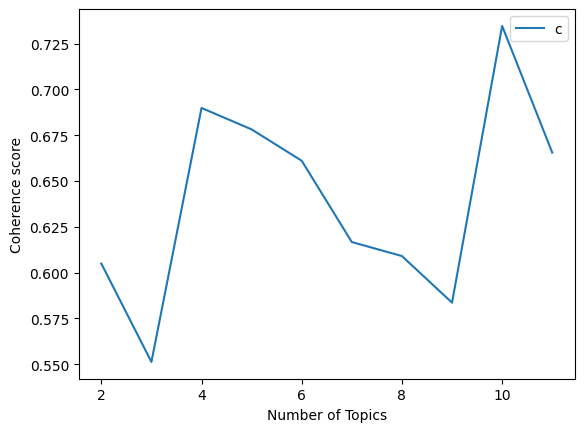

In [45]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [46]:

model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.432*"blood" + 0.432*"pressur" + 0.335*"easi" + 0.311*"monitor" + 0.222*"read" + 0.170*"accur" + 0.161*"use" + 0.151*"take" + 0.129*"recommend" + 0.127*"like"'), (1, '-0.341*"use" + 0.255*"take" + 0.250*"pressur" + 0.250*"blood" + -0.239*"monitor" + -0.234*"would" + -0.213*"recommend" + -0.177*"read" + 0.175*"accur" + -0.166*"easi"'), (2, '-0.237*"use" + -0.236*"take" + -0.225*"know" + -0.212*"accuraci" + 0.206*"easi" + -0.196*"well" + -0.182*"time" + -0.169*"realli" + -0.169*"first" + -0.167*"great"'), (3, '0.292*"monitor" + -0.279*"one" + -0.242*"easi" + -0.207*"take" + 0.199*"need" + -0.195*"unit" + -0.153*"batteri" + -0.144*"help" + -0.140*"home" + 0.139*"visit"'), (4, '-0.332*"use" + -0.263*"take" + 0.247*"unit" + 0.244*"great" + -0.236*"often" + 0.208*"time" + 0.133*"store" + 0.126*"like" + -0.121*"easi" + -0.118*"abl"'), (5, '0.257*"unit" + 0.230*"great" + -0.198*"read" + 0.197*"store" + -0.184*"like" + -0.158*"know" + 0.149*"work" + 0.144*"monitor" + 0.137*"bp" + 0.137*"

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [47]:
# Write your code here

!pip install lda2vec



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from google.colab import files
uploades = files.upload()

Saving topics.pyldavis.npz to topics.pyldavis (3).npz


In [49]:
npz = np.load(open('/content/topics.pyldavis.npz', 'rb'), allow_pickle=True)
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()

In [50]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

In [51]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [52]:
pyLDAvis.display(prepared_data)

In [54]:

raw_data = pd.read_csv('output.csv')
raw_data = raw_data.dropna()
raw_data.head()

,Title,Review
0,Convenient Blood Pressure monitor,Due to fluctuating blood pressure I have had ...
1,Easy to read and use,After my last Doctors visit I had a high bloo...
2,Good monitor,I really like this monitor took it with me to...
3,Accurate and easy to use,This is well made and a great price I know it...
4,Easy to use by yourself,I bought this to check blood pressure when alo...


In [55]:
from nltk.tokenize import RegexpTokenizer

# Load data from a CSV file into a dataframe
data = pd.read_csv('output.csv')

# Define a tokenizer to extract words from text
tokenizer = RegexpTokenizer(r'\w+')

# Apply the tokenizer to the 'Review' column of the dataframe
data['Review'] = data['Review'].apply(tokenizer.tokenize)

In [56]:
stopwords_list = stopwords.words('english')

In [57]:
data['Review']=data['Review'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [58]:
data['Review'].tail()

85    [Very, easy, set, Like, way, solely, rely, bat...
86    [I, purchased, BP, monitor, replace, different...
87    [I, please, BP, monitor, It, easy, use, Come, ...
88    [Product, perfect, mom, low, blood, pressure, ...
89    [This, helpful, device, home, monitoring, bloo...
Name: Review, dtype: object

In [59]:
#Description of news text information
all_words = [word for tokens in data['Review'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['Review']]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

2961 words total, with a vocabulary size of 194
Max sentence length is 55


In [60]:
from collections import Counter
counter = Counter(all_words)
counter.most_common(20)

[('I', 261),
 ('blood', 99),
 ('pressure', 99),
 ('easy', 99),
 ('monitor', 72),
 ('use', 54),
 ('accurate', 54),
 ('well', 45),
 ('It', 45),
 ('recommend', 45),
 ('This', 36),
 ('reading', 36),
 ('time', 36),
 ('great', 36),
 ('unit', 36),
 ('take', 27),
 ('like', 27),
 ('big', 27),
 ('accuracy', 27),
 ('doctor', 27)]

In [61]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

In [62]:
def LDA_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Words of Topic ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict)

In [63]:
data_text=pd.DataFrame(data['Review'])
data_text=data_text.rename(columns={'Review':'Review'})

In [64]:
train_ = [value[0] for value in data_text.iloc[0:].values]

In [65]:
num_topics = 20
id2word1 = gensim.corpora.Dictionary(train_)
corpus1 = [id2word1.doc2bow(text) for text in train_]
#Calling the LDA model and feeding the calculated text, dictionary and topics
from gensim.models import ldamodel
lda2vec = ldamodel.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=num_topics)
LDA_topics(lda2vec, num_topics)

,Words of Topic 01,Words of Topic 02,Words of Topic 03,Words of Topic 04,Words of Topic 05,Words of Topic 06,Words of Topic 07,Words of Topic 08,Words of Topic 09,Words of Topic 10,Words of Topic 11,Words of Topic 12,Words of Topic 13,Words of Topic 14,Words of Topic 15,Words of Topic 16,Words of Topic 17,Words of Topic 18,Words of Topic 19,Words of Topic 20
0,I,I,I,I,easy,I,blood,easy,easy,I,I,I,I,I,I,I,I,I,I,stored
1,monitor,stored,time,easy,blood,blood,pressure,helps,Very,monitor,pressure,blood,pressure,great,unit,monitor,accurate,monitor,numbers,great
2,use,used,know,pressure,pressure,pressure,I,single,Like,use,blood,pressure,blood,stored,recommend,use,use,pressure,readings,I
3,stored,great,accurate,blood,This,monitor,easy,Like,would,well,It,easy,monitor,blood,great,reading,pressure,blood,push,doctor
4,great,easy,without,accurate,use,easy,It,sweet,helps,easy,take,accurate,easy,pressure,monitor,well,This,easy,plug,pressure
5,fit,monitor,strap,time,accurate,Zixcare,take,way,black,It,accurate,doctor,well,doctor,Zixcare,made,blood,used,see,blood
6,easy,Batteries,get,big,doctor,recommend,often,unit,single,recommend,well,compared,It,alone,took,It,easy,like,one,alone
7,BP,unit,good,know,I,Doctors,accurate,Very,home,BP,often,seems,accurate,bought,brand,time,well,reading,helps,Still
8,recommend,blood,doubt,recommend,home,good,use,blood,plug,home,easy,home,take,values,BP,accurate,It,accurate,home,unit
9,home,pressure,really,unit,It,Pressure,This,batteries,batteries,would,This,well,recommend,Works,inflating,great,time,recommend,buy,check


In [66]:
#Computing the Topic Coherence with 20
coherence_using_lda2vec = CoherenceModel(model=lda2vec, texts=train_, dictionary=id2word1, coherence='c_v')
coherence = coherence_using_lda2vec.get_coherence()
print('Coherence Score: ', round(coherence, 3))

Coherence Score:  0.677


In [67]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda2vec, 
                              corpus=corpus1, 
                              dictionary=id2word1)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [68]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('output.csv')
raw_data = raw_data.dropna()
raw_data.head()




,Title,Review
0,Convenient Blood Pressure monitor,Due to fluctuating blood pressure I have had ...
1,Easy to read and use,After my last Doctors visit I had a high bloo...
2,Good monitor,I really like this monitor took it with me to...
3,Accurate and easy to use,This is well made and a great price I know it...
4,Easy to use by yourself,I bought this to check blood pressure when alo...


In [69]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

raw_data["Review"] = raw_data["Review"].apply(cleantext)

raw_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Review
0,Convenient Blood Pressure monitor,Due to fluctuating blood pressure I have had ...
1,Easy to read and use,After my last Doctors visit I had a high bloo...
2,Good monitor,I really like this monitor took it with me to...
3,Accurate and easy to use,This is well made and a great price I know it...
4,Easy to use by yourself,I bought this to check blood pressure when alo...


In [70]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from bertopic import BERTopic

In [72]:
Review = raw_data['Review'].to_list()


In [73]:
topic_model = BERTopic(language="english")
topics = topic_model.fit_transform(Review)

In [74]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,16,-1_to_is_and_it
1,0,26,0_monitor_the_to_its
2,1,18,1_is_the_accurate_and
3,2,15,2_very_to_it_use
4,3,15,3_and_it_one_easy


In [75]:
topic_model.visualize_topics()

In [76]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [77]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [78]:
bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(Review)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2023-04-03 03:58:17,655 - BERTopic - Transformed documents to Embeddings
2023-04-03 03:58:21,856 - BERTopic - Reduced dimensionality
2023-04-03 03:58:21,870 - BERTopic - Clustered reduced embeddings


In [79]:
bigram_freq = bigram_topic_model.get_topic_info() 
bigram_freq

,Topic,Count,Name
0,-1,11,-1_blood pressure_easy to_my blood_pressure mo...
1,0,25,0_this is_for her_is accurate_you are
2,1,23,1_pressure monitor_blood pressure_to the_easy to
3,2,16,2_it very_it to_to be_very easy
4,3,15,3_activation for_in too_rely on_the way


In [80]:
bigram_topic_model.visualize_topics()

In [81]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [82]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [83]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [84]:
# Write your answer here (no code needed for this question)


"""
Comparing various topic modeling techniques such as LDA, LSA, LDA2VEC, and BERT
can be challenging due to their strengths and weaknesses. It is essential to consider 
various factors such as performance metrics like coherence score, model complexity, speed, and domain-specific factors.

LSA is a distributional semantics technique that analyzes the relationship between documents and terms. It generates a set 
 of concepts related to the terms and documents.

LDA is a topic modeling technique that assigns documents to different categories based on the topics they belong to.

BERT is a pre-trained model used for tasks such as text classification and question answering, and not for topic modeling.

In terms of coherence score, LDA outperforms LDA2VEC with a score of 8 compared to 0.6, indicating that LDA can generate more coherent topics.
However, the coherence score is just one metric, and it is essential to evaluate models based on other criteria such as topic interpretability and relevance to the data.

Overall, it is crucial to choose the right technique based on the specific use case and requirements. While LDA may perform better in terms of coherence score, 
it may not be suitable for all scenarios. Therefore, it is important to consider various factors and select the appropriate technique that meets the specific requirements.

"""
